In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
url="https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"
response=requests.get(url)
soup=BeautifulSoup(response.text,'html')
soup

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-featu

In [6]:
table = soup.find_all('table')[1]
table


<table class="wikitable sortable">
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD billions)
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Cargill" title="Cargill">Cargill</a>
</td>
<td>Food industry
</td>
<td style="text-align:center;">177
</td>
<td style="text-align:center;">160,000
</td>
<td><a href="/wiki/Minnetonka,_Minnesota" title="Minnetonka, Minnesota">Minnetonka, Minnesota</a>
</td></tr>
<tr>
<td>2
</td>
<td><a class="mw-redirect" href="/wiki/Koch_Industries" title="Koch Industries">Koch Industries</a>
</td>
<td>Conglomerate
</td>
<td style="text-align:center;">125
</td>
<td style="text-align:center;">120,000
</td>
<td><a href="/wiki/Wichita,_Kansas" title="Wichita, Kansas">Wichita, Kansas</a>
</td></tr>
<tr>
<td>3
</td>
<td><a class="mw-redirect" href="/wiki/Publix_Super_Markets" title="Publix Super Markets">Publix Super Markets</a>
</td>
<td>Retail
</td>
<td style="text-align:center;">54.5
</td>


In [8]:
titles=table.find_all('th')
titles
for i in titles:
    print(i.text)

Rank

Name

Industry

Revenue (USD billions)

Employees

Headquarters



In [9]:
titles_collection=[title.text.replace("\n",'').strip() for title in titles]
titles_collection

['Rank',
 'Name',
 'Industry',
 'Revenue (USD billions)',
 'Employees',
 'Headquarters']

In [10]:
table_data=pd.DataFrame(columns=titles_collection)
table_data

,Rank,Name,Industry,Revenue (USD billions),Employees,Headquarters


In [11]:
collumn_data=table.find_all('tr')
collumn_data

[<tr>
 <th>Rank
 </th>
 <th>Name
 </th>
 <th>Industry
 </th>
 <th>Revenue <br/>(USD billions)
 </th>
 <th>Employees
 </th>
 <th>Headquarters
 </th></tr>,
 <tr>
 <td>1
 </td>
 <td><a href="/wiki/Cargill" title="Cargill">Cargill</a>
 </td>
 <td>Food industry
 </td>
 <td style="text-align:center;">177
 </td>
 <td style="text-align:center;">160,000
 </td>
 <td><a href="/wiki/Minnetonka,_Minnesota" title="Minnetonka, Minnesota">Minnetonka, Minnesota</a>
 </td></tr>,
 <tr>
 <td>2
 </td>
 <td><a class="mw-redirect" href="/wiki/Koch_Industries" title="Koch Industries">Koch Industries</a>
 </td>
 <td>Conglomerate
 </td>
 <td style="text-align:center;">125
 </td>
 <td style="text-align:center;">120,000
 </td>
 <td><a href="/wiki/Wichita,_Kansas" title="Wichita, Kansas">Wichita, Kansas</a>
 </td></tr>,
 <tr>
 <td>3
 </td>
 <td><a class="mw-redirect" href="/wiki/Publix_Super_Markets" title="Publix Super Markets">Publix Super Markets</a>
 </td>
 <td>Retail
 </td>
 <td style="text-align:center;">54.

In [12]:
for row in collumn_data[1:]:
    row_data=row.find_all("td")
    individual_row_data=[data.text.strip() for data in row_data]
    length=len(table_data)
    table_data.loc[length]=individual_row_data
table_data


,Rank,Name,Industry,Revenue (USD billions),Employees,Headquarters
0,1,Cargill,Food industry,177,"160,000","Minnetonka, Minnesota"
1,2,Koch Industries,Conglomerate,125,"120,000","Wichita, Kansas"
2,3,Publix Super Markets,Retail,54.5,"250,000","Lakeland, Florida"
3,4,"Mars, Incorporated",Food industry,47,"140,000","McLean, Virginia"
4,5,H-E-B,Retail,43.6,"145,000","San Antonio, Texas"
5,6,Reyes Holdings,Wholesaling,40,"36,000","Rosemont, Illinois"
6,7,Enterprise Holdings,Car rental,35,"90,000","Clayton, Missouri"
7,8,C&S Wholesale Grocers,Wholesaling,34.7,"15,000","Keene, New Hampshire"
8,9,Love's,Petroleum industry and Retail,26.5,"40,000","Oklahoma City, Oklahoma"
9,10,Southern Glazer's Wine and Spirits,Food industry,26.0,"24,000","Miramar, Florida"


In [13]:
individual_row_data

['10',
 "Southern Glazer's Wine and Spirits",
 'Food industry',
 '26.0',
 '24,000',
 'Miramar, Florida']

In [14]:
table_data.to_csv("List of companies.vsv, index=False")

In [15]:
text="".join(table_data["Name"])
text

"CargillKoch IndustriesPublix Super MarketsMars, IncorporatedH-E-BReyes HoldingsEnterprise HoldingsC&S Wholesale GrocersLove'sSouthern Glazer's Wine and Spirits"

<function matplotlib.pyplot.show(close=None, block=None)>

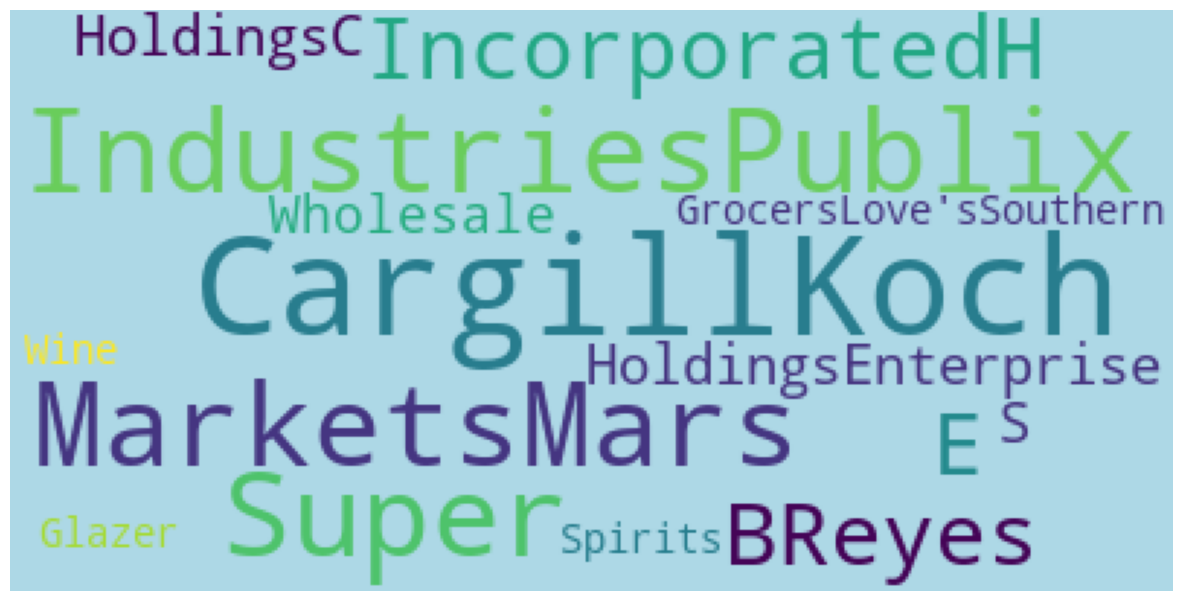

In [50]:
wordcloud=WordCloud(background_color='lightblue').generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show